<a href="https://colab.research.google.com/github/maxbobkov/stable_diffusion/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Пробуем в деле нейросеть Stable Diffusion** 

Stable Diffusion - модель генерации изображений, созданная инженерами из компаний [CompVis](https://github.com/CompVis), [Stability AI](https://stability.ai/) и [LAION](https://laion.ai/). Модель обучалась на огромном количестве пар картинка-текст, способна смешивать смыслы и образы, создавая картинки по текстовому запросу. 

### Первичная настройка

Убедитесь, что сервис Google Colab, в котором мы находимся,  предоставил доступ к графическому ускорителю (GPU), так расчеты будут выполняться гораздо быстрее. Запустите код в ячейке ниже, нажав на треугольник в кружке слева от команды `!nvidia-smi`. 

Если при запуске кода появилась табличка с параметрами видеокарты, то все ОК. Если команда не выполнится, в меню наверху `Среда выполнения`  выберите `Сменить среду выполнения`. Установите Аппаратный ускоритель: GPU.


In [ ]:
!nvidia-smi


Установите необходимые библиотеки, запустив код в ячейке ниже и дождитесь, пока он отработает (рядом с кнопкой запуска кода появится зеленая галочка). В процессе будет появляться много строк текста - это нормально.

In [ ]:
!pip install diffusers==0.2.4
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

Вам нужно зарегистрироваться на сайте [Hugging Face Hub](https://huggingface.co/), и получить на нем токен доступа к модели, чтобы код заработал. После логина на сайте huggingface.co пройдите по ссылке: https://huggingface.co/settings/tokens, нажмите кнопку New token и затем Generate token. Скопируйте токен (сначала нажав SHOW, чтобы увидеть его, токен пригодится позже).

Еще необходимо принять лицензию перед ее использованием. Залогинившись на сайте huggingface.co нужно посетить [карточку модели](https://huggingface.co/CompVis/stable-diffusion-v1-4), прочитать лицензию и поставить галочку. 



Запустите код в ячейке ниже и дождитесь пока он отработает

In [3]:
from google.colab import output
output.enable_custom_widget_manager()

А теперь запустите следующий код, в процессе его выполнения появится строка запроса, в которую нужно вставить токен, полученный ранее и нажать кнопку Login. В случае успеха появится надпись `Login successful
Your token has been saved to /root/.huggingface/token`. Красный текст ниже игнорируйте. Если выпадет ошибка, перезапустите эту ячейку и вставьте корректный токен

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

### Загружаем модель Stable Diffusion

Запустить код в ячейке ниже, будут последовательно загружаться 18 тяжелых файлов, дождитесь окончания всех загрузок

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)  

Запустите код ниже, чтобы загрузить модель в видеокарту для дальнейших расчетов

In [ ]:
pipe = pipe.to("cuda")

И, наконец, самое интересное! Впишите свой запрос вместо "a photograph of an astronaut riding a horse" (не забывайте кавычки, а то будет ошибка) и запустите код в ячейке. Модель пройдет 51 итерацию при построении изображения и выведет его чуть ниже. Картинку можно сохранить как обычно в браузере - правую клавишу мыши и "Сохранить изображение как..."

0it [00:00, ?it/s]

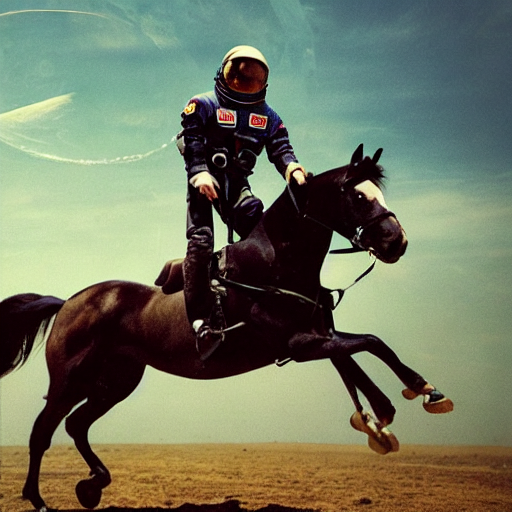

In [ ]:
from torch import autocast

prompt = "a photograph of an astronaut riding a horse"

with autocast("cuda"):
  image = pipe(prompt)["sample"][0]  

image

Запуская код в ячейке выше несколько раз, вы каждый раз будете получать новое изображение. Меняйте текстовый запрос, экспериментируйте! Для вдохновения рекомендую поисковик текстовых запросов к модели: https://lexica.art/

Хорошего творчества!